In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [3]:

n_dim = 2
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    A=np.array([[5.,4],[4,5.]])
    b=np.array([7.,2.])
    return 0.5*np.dot(x, np.dot(A,x)) - np.dot(b,x)

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return np.dot(A,x) - b

def gradient_descent_update(x, eta=1.):
    """
    Arguments:
    x: 1 dimensional numpy array as input. Representing x_t
    eta: step size
    
    Returns:
    x_next: 1-dimensional numpy array with same shape as x. 
    Representing one Gradient descent step with constant step size eta

    """
    grad = get_gradient(x)
    return x-eta*grad


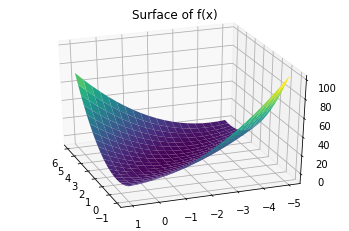

In [126]:
'''
Plotting 3D surface of f(x)
'''
from mpl_toolkits import mplot3d

# generating Data
nx = 20
ny = 20
x_axis = np.linspace(-1,6,nx)
y_axis = np.linspace(-5,1,ny)
X_axis,Y_axis = np.meshgrid(x_axis,y_axis)
X_plot = np.concatenate((np.reshape(X_axis,(nx*ny,1)),np.reshape(Y_axis,(nx*ny,1))),axis = 1)
Z = np.zeros((X_plot.shape[0],))

for i in range(Z.shape[0]):
             
        Z[i] = get_value(X_plot[i,:])

Z = np.reshape(Z, (nx,ny))

# Plotting begins

fig = plt.figure()
ax = plt.axes(projection= "3d")

#ax.plot_wireframe(X_axis,Y_axis,Z)
ax.plot_surface(X_axis, Y_axis, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_title('Surface of f(x)')
ax.view_init(30, azim=160)
ax.figure.savefig("movie%d.png" % 160)
plt.show()     
            

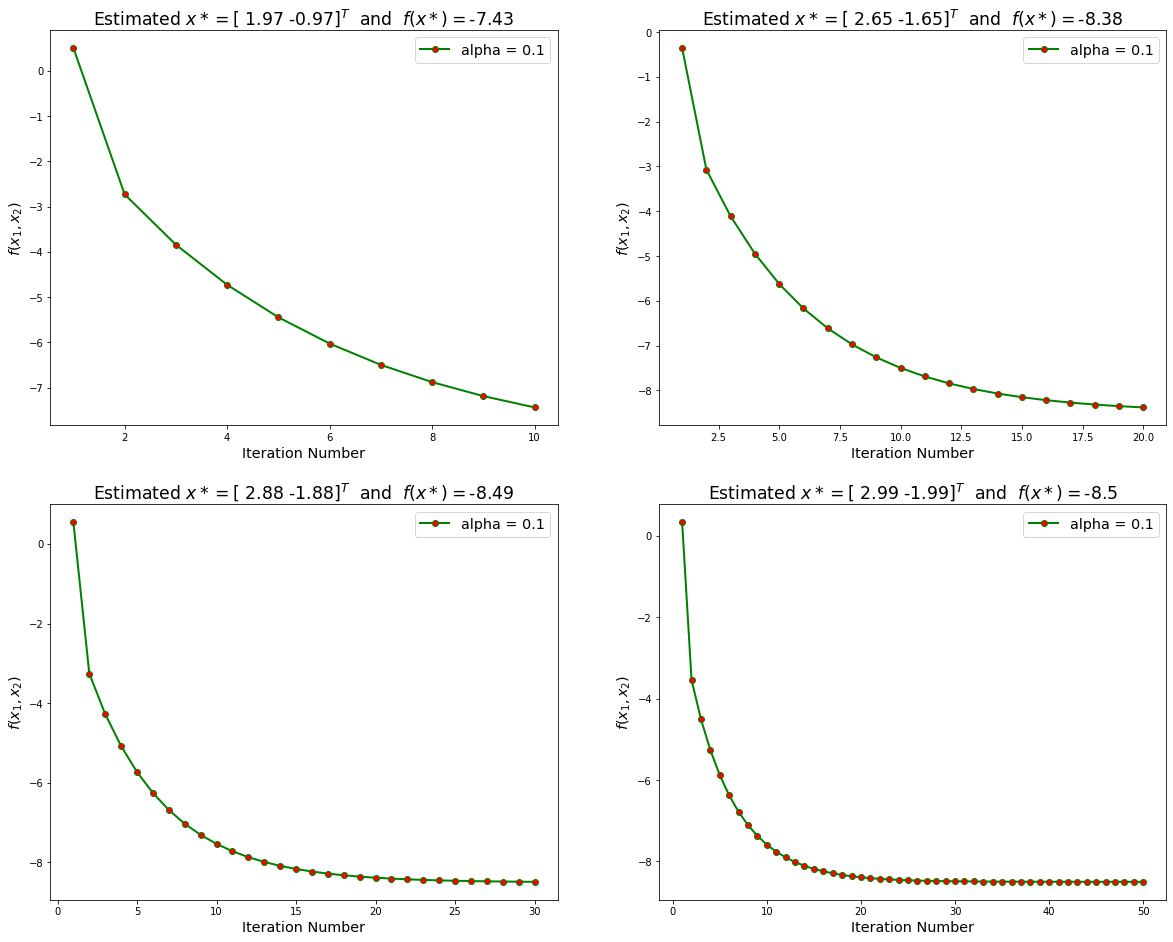

In [75]:
'''
Code for : Function value versus number of Iterations performed for alpha =0.1
'''

fig = plt.figure(figsize = (20,16)) # 4 subplots, one for each value of n  
count = 1                           # counter for the subplot number
for iters in [10,20,30,50]:         # values of n
    eta = 0.1                       # step size
    f_vals=[]                       # function value will be stored in fvals
    x_list=[]                       # x value corresponding to each fvals will be stored
    
    x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1 #random intialisation of x

    for t in range(iters):          # performing GD update

        x_list.append(x)
        f_vals.append(get_value(x)) # appending function values
        x = gradient_descent_update(x=x, eta=eta) 
        
    x_list = np.array(x_list)       # x values obtained from GD
    x  = [i+1 for i in range(len(f_vals))] # number of iterations, n
    
    plt.subplot(2,2,count)
    plt.plot(x,f_vals,marker = 'o',markerfacecolor= 'r',color = 'g',label= 'alpha = '+str(eta),lw = 2,markersize = 6)
    plt.xlabel('Iteration Number', fontsize = "x-large")
    plt.ylabel('$f (x_1,x_2)$',fontsize="x-large")
    plt.title('Estimated $x* = $'+str(np.round(x_list[-1,:],2))+'$^T$'"  and  "'$f(x*)= $'+str(np.round(f_vals[-1],2)),fontsize='xx-large')
    plt.legend(fontsize="x-large")
    count = count +1                # updating the counter
     
fig.savefig("fvsn.png",bbox_inches = 'tight') #saving the figure

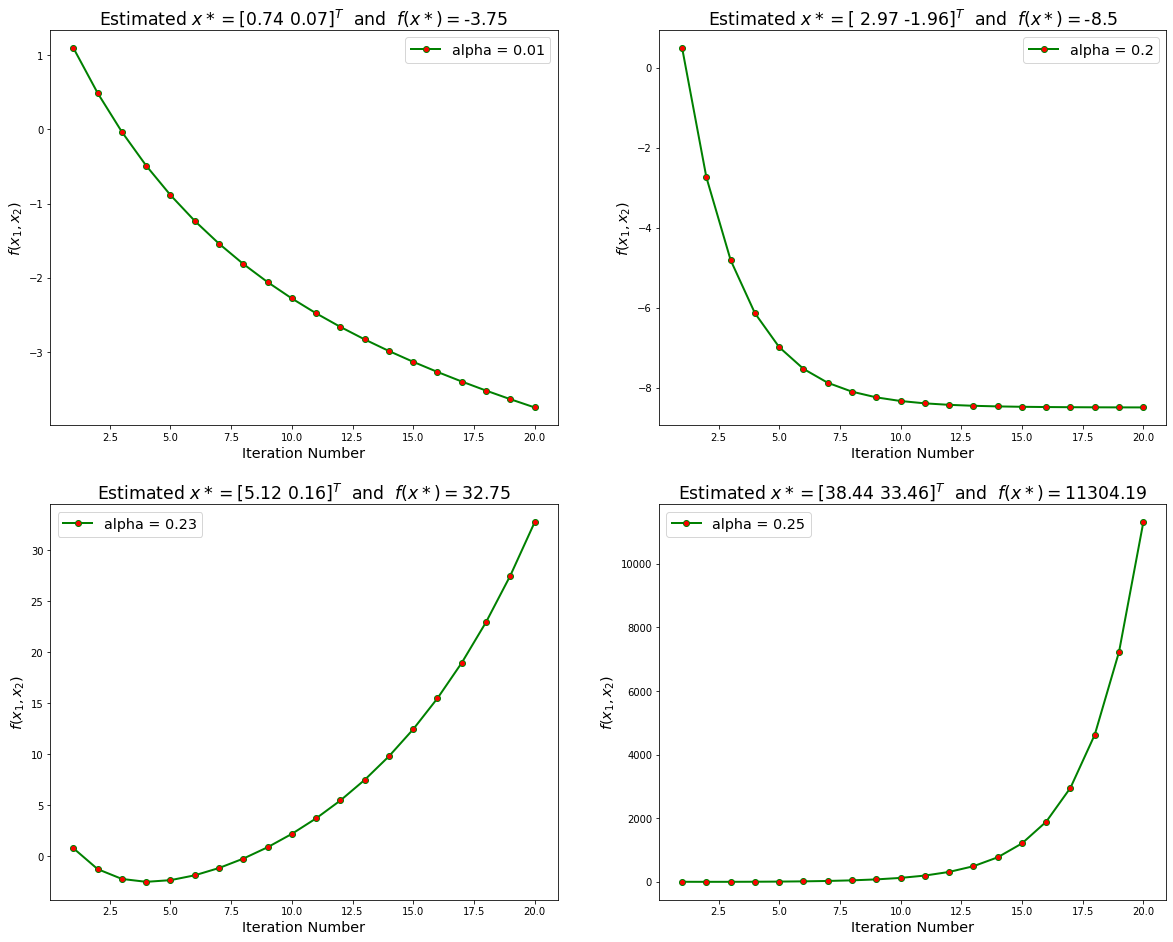

In [74]:
'''
   Code for : Function value versus number of Iterations performed for different alphas
'''

fig = plt.figure(figsize = (20,16)) # 4 subplots, one for each value of n
count = 1                           # counter for the subplot number
for eta in [0.01,0.2,0.23,0.25]:    # values of alpha 
    iters = 20                      # limiting the number of iteration to 20
    f_vals=[]                       # function value will be stored in fvals
    x_list=[]                       # x value corresponding to each fvals will be stored
    
    x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1 # random initialisation of x

    for t in range(iters):          # performing GD updates

        x_list.append(x)
        f_vals.append(get_value(x))
        x = gradient_descent_update(x=x, eta=eta)
        
    x_list = np.array(x_list)

    x  = [i+1 for i in range(len(f_vals))]
    
    plt.subplot(2,2,count)
    plt.xlabel('Iteration Number', fontsize = "x-large")
    plt.ylabel('$f (x_1,x_2)$',fontsize="x-large")
    plt.plot(x,f_vals,marker = 'o',markerfacecolor= 'r',color = 'g',label= 'alpha = '+str(eta),lw = 2,markersize = 6)
    plt.title('Estimated $x* = $'+str(np.round(x_list[-1,:],2))+'$^T$'"  and  "'$f(x*)= $'+str(np.round(f_vals[-1],2)),fontsize='xx-large')
    plt.legend(fontsize="x-large")
    count = count +1 


    
     
fig.savefig("combined.png",bbox_inches = 'tight') # saving figure

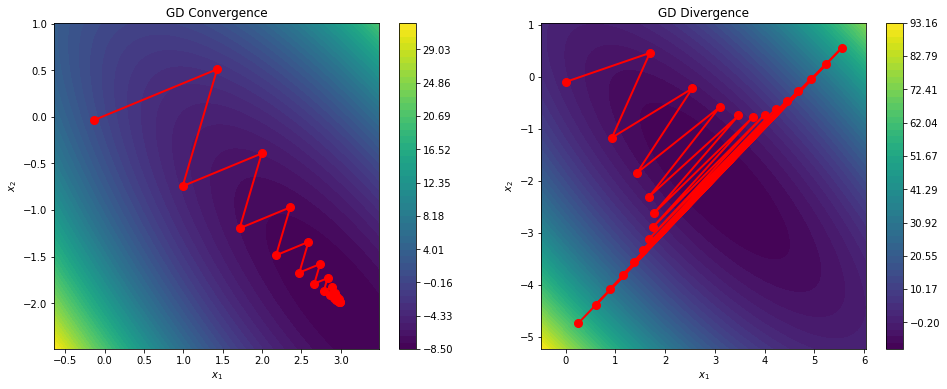

In [69]:
'''
Code for : Contours of f for alpha = 0.2 and 0.23 for 25 itertions
'''
count = 1
fig = plt.figure(figsize = (16,6))
Xvals =[] 
for eta in [0.2,0.23]:
    iters = 25
    f_vals=[]
    x_list=[]
    x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(iters):

        x_list.append(x)
        f_vals.append(get_value(x))
        x = gradient_descent_update(x=x, eta=eta)
        
    x_list = np.array(x_list)
    Xvals.append(x_list)
    
    # Generating data for plotting contours
    delta=0.025
    x_axis = np.arange(np.min(x_list[:,0])-0.5, np.max(x_list[:,0])+0.5 , delta)
    y_axis = np.arange(np.min(x_list[:,1])-0.5, np.max(x_list[:,1])+0.5 , delta)

    X, Y = np.meshgrid(x_axis, y_axis)

    Z = np.zeros(X.shape)

    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            input_vec = np.array([X[i,j],Y[i,j]])
            Z[i,j] = get_value(input_vec) 

    levels = np.linspace(Z.min(), Z.max(), 50)

    plt.subplot(1,2,count)
    
    #plotting contours
    plt.contourf(X,Y,Z,levels=levels, cmap="viridis")
    plt.colorbar()
    
    #Plotting trajectory
    plt.plot(x_list[:,0],x_list[:,1], marker='o',color = 'r', markersize=8, lw=2) 
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    if count == 1:
        plt.title('GD Convergence')
    else:
        plt.title('GD Divergence')
    count = count +1
    
fig.savefig("CD02.png",bbox_inches = 'tight')

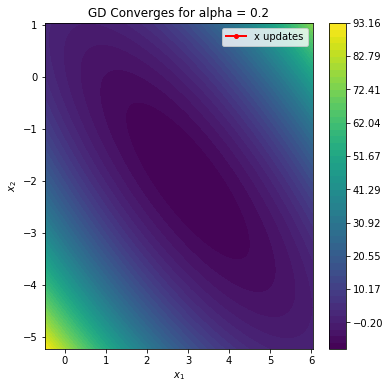

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [85]:
"""
Code for animation of trajectory of GD updates for Convergent case
"""

x = Xvals[0][:,0] 
y = Xvals[0][:,1]

figl,ax = plt.subplots(figsize = (6,6))
plt.contourf(X,Y,Z,levels=levels, cmap="viridis")
plt.colorbar(ax = ax)

plt.title('GD Converges for alpha = 0.2')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

line, = ax.plot(x, y, color='r',lw = 2,marker = 'o',markersize = 4,label = 'x updates')
ax.legend()

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    #line.axes.axis([min(x)-0.5,max(x)+.5, min(y)-0.5, max(y)+0.5])
    return line,

ani = animation.FuncAnimation(figl, update, len(x), fargs=[x, y, line],
                              interval=500, blit=True)
plt.show()
ani.save('Ani1.gif')


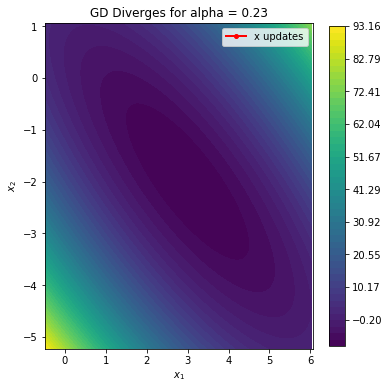

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [84]:
"""
Code for animation of trajectory of GD updates for Divergent case
"""
x = Xvals[1][:,0]
y = Xvals[1][:,1]

figl, ax = plt.subplots(figsize=(6,6))
plt.contourf(X,Y,Z,levels=levels)
plt.colorbar(ax=ax, shrink=.98)
plt.title('GD Diverges for alpha = 0.23')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
line, = ax.plot(x, y, color='r',lw = 2,marker = 'o',markersize = 4,label = 'x updates')
ax.legend()

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([min(x)-0.5,max(x)+.5, min(y)-0.5, max(y)+0.5])
    return line,

ani = animation.FuncAnimation(figl, update, len(x), fargs=[x, y, line],
                              interval=500, blit=True)
plt.show()
ani.save('Ani2.gif')
